<a href="https://colab.research.google.com/github/kalra-nitish/NLP/blob/main/TensorFlow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-07-26 02:16:54--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  11.7MB/s    in 0.3s    

2024-07-26 02:16:55 (11.7 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [16]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

In [4]:
df = pd.read_csv('AirlineTweets.csv')

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df = df[['airline_sentiment', 'text']]

<Axes: >

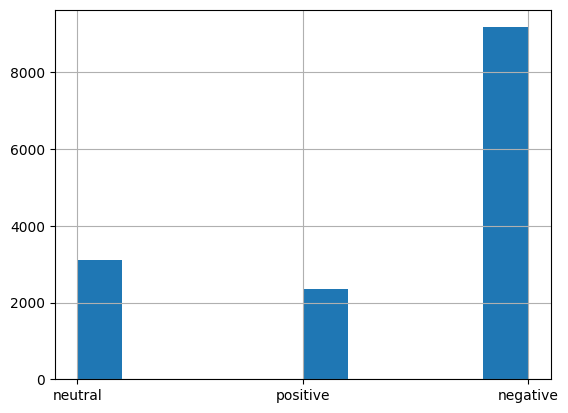

In [7]:
df['airline_sentiment'].hist()

In [8]:
df = df[df['airline_sentiment'] != 'neutral'].copy()

In [9]:
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [11]:
df_train, df_test = train_test_split(df, random_state=42)

In [12]:
vectorizer = TfidfVectorizer(max_features = 2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

In [13]:
# data must not be sparse ,atrix before passing ito tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [14]:
Y_train = df_train['target']
Y_test = df_test['target']

In [17]:
#input dimensions
D = X_train.shape[1]
#build model
i = Input(shape=(D,))
x = Dense(1)(i) #sigmoid included in loss
model = Model(i, x)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.01), metrics=['accuracy']
)

In [20]:
r = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=40,
    batch_size=32
)

Epoch 1/40
271/271 [==============================] - 4s 4ms/step - loss: 0.4187 - accuracy: 0.8001 - val_loss: 0.3180 - val_accuracy: 0.8365
Epoch 2/40
271/271 [==============================] - 1s 3ms/step - loss: 0.2844 - accuracy: 0.8474 - val_loss: 0.2573 - val_accuracy: 0.8749
Epoch 3/40
271/271 [==============================] - 1s 2ms/step - loss: 0.2312 - accuracy: 0.8850 - val_loss: 0.2294 - val_accuracy: 0.9037
Epoch 4/40
271/271 [==============================] - 1s 3ms/step - loss: 0.2003 - accuracy: 0.9065 - val_loss: 0.2124 - val_accuracy: 0.9130
Epoch 5/40
271/271 [==============================] - 1s 3ms/step - loss: 0.1796 - accuracy: 0.9185 - val_loss: 0.2023 - val_accuracy: 0.9196
Epoch 6/40
271/271 [==============================] - 1s 4ms/step - loss: 0.1646 - accuracy: 0.9280 - val_loss: 0.1957 - val_accuracy: 0.9200
Epoch 7/40
271/271 [==============================] - 1s 5ms/step - loss: 0.1527 - accuracy: 0.9345 - val_loss: 0.1912 - val_accuracy: 0.9224
Epoch 

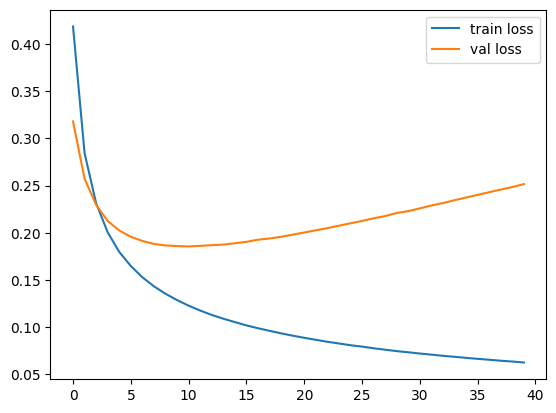

In [21]:
#plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

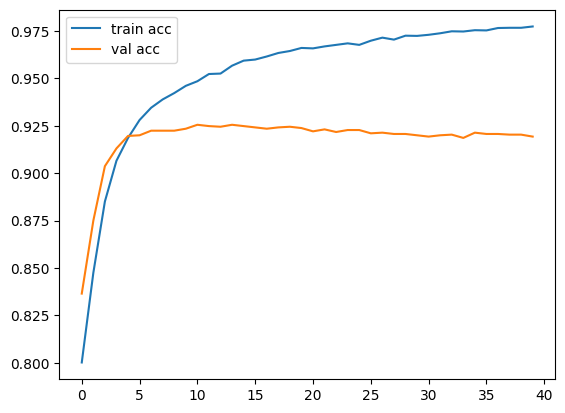

In [22]:
#plt accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [24]:
P_train = ((model.predict(X_train) > 0)*1.0).flatten()
P_test = ((model.predict(X_test) > 0)*1.0).flatten()

91/91 [==============================] - 0s 3ms/step


In [25]:
cm = confusion_matrix(Y_train, P_train, normalize = 'true')

In [26]:
cm

array([[0.99387309, 0.00612691],
       [0.05222222, 0.94777778]])

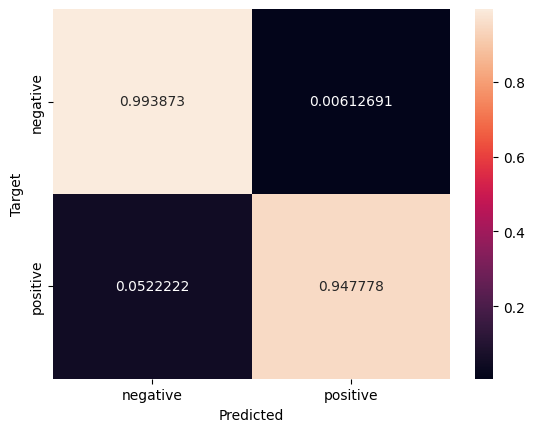

In [28]:
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

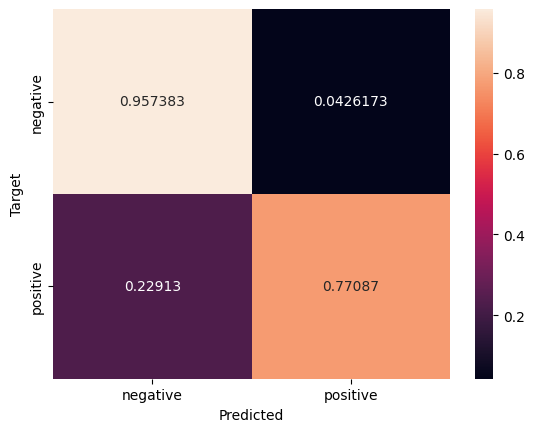

In [29]:
cm_test = confusion_matrix(Y_test,P_test, normalize='true')
plot_cm(cm_test)

In [30]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

91/91 [==============================] - 0s 3ms/step
Train AUC: 0.9978965070102925
Test AUC: 0.9446212827321809


In [31]:
print("Train F1:", f1_score(Y_train, P_train))
print("Test F1:", f1_score(Y_test, P_test))

Train F1: 0.9616685456595265
Test F1: 0.7919708029197081


In [32]:
model.layers

In [33]:
model.layers[1].get_weights()

[array([[-7.7199187],
        [ 5.695853 ],
        [-2.1673334],
        ...,
        [ 3.3423116],
        [ 3.1671233],
        [-4.1800914]], dtype=float32),
 array([-0.11966851], dtype=float32)]

In [34]:
w = model.layers[1].get_weights()[0]

In [35]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'jetblue': 973,
 'thanks': 1726,
 'for': 753,
 'having': 855,
 'us': 1859,
 'hang': 838,
 'out': 1262,
 'at': 197,
 'tampa': 1708,
 'airport': 122,
 'forever': 756,
 'today': 1767,
 'it': 964,
 'really': 1420,
 'been': 243,
 'an': 147,
 'awesome': 217,
 'experience': 654,
 'americanair': 143,
 'was': 1898,
 'told': 1770,
 'you': 1993,
 'could': 452,
 'only': 1245,
 'refund': 1434,
 'me': 1107,
 'the': 1730,
 'cost': 448,
 'of': 1224,
 'my': 1179,
 'original': 1254,
 'return': 1476,
 'flight': 726,
 'note': 1211,
 'had': 828,
 'booked': 273,
 'more': 1164,
 'expensive': 653,
 'everyone': 635,
 'else': 602,
 'outstanding': 1267,
 'united': 1842,
 'denver': 516,
 'to': 1766,
 'austin': 207,
 'still': 1660,
 'on': 1239,
 'ground': 820,
 'issue': 961,
 'is': 959,
 'lack': 999,
 'announcement': 151,
 'made': 1086,
 'so': 1606,
 'late': 1010,
 'when': 1929,
 'gate': 793,
 'agent': 113,
 'there': 1734,
 'over': 1268,
 'hour': 897,
 'southwestair': 1626,
 'hold': 880,
 '30': 36,
 'min': 1141,


In [39]:
#lets look at the weight for each word
#try it with different threshold values
threshold = 2

print("Most positive words")
word_weight_tuples = []
for word, index in word_index_map.items():
  weight = w[index, 0]
  if weight > threshold:
    word_weight_tuples.append((weight, word))
word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most positive words
5.695853 000
2.477394 1000
2.05208 20min
3.2950606 2x
5.314466 35
2.0264351 36
4.506713 737
4.544188 777
2.231399 90
3.0296748 able
